In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
register_matplotlib_converters()
from time import time

# Import meal data

In [2]:
#read data
cgm_to_meal = pd.read_csv('data/cgm_to_meal.csv')
cgm_to_meal = cgm_to_meal.dropna()
cgm_no_meal = cgm_to_meal.loc[cgm_to_meal['meal']==0]
cgm_no_meal.head()

,cgm,meal
0,118.0,0
1,122.0,0
5,124.0,0
6,126.0,0
7,127.0,0


In [3]:
cgm_no_meal = cgm_no_meal['cgm'].to_numpy()
cgm_no_meal

array([118., 122., 124., ..., 314., 310., 314.])

In [42]:
cgm_meal = cgm_to_meal.loc[cgm_to_meal['meal']==1]['cgm'].to_numpy()
cgm_meal_index = cgm_to_meal[cgm_to_meal['meal'] == 1].index.to_numpy()
cgm_meal_index

array([   39,    46,    47,    48,    64,    65,    87,    88,   148,
         156,   157,   247,   255,   256,   343,   370,   371,   372,
         373,   470,   571,   572,   581,   601,   607,   617,   633,
         640,   664,   665,   677,   699,   703,   735,   748,   757,
         794,   807,   808,   823,   845,   879,   883,   897,   930,
         946,   947,   948,   957,  1006,  1007,  1008,  1031,  1088,
        1114,  1120,  1165,  1166,  1172,  1173,  1198,  1199,  1242,
        1243,  1244,  1245,  1252,  1269,  1270,  1280,  1281,  1370,
        1457,  1510,  1570,  1616,  1619,  1643,  1833,  1868,  1869,
        1870,  1871,  1913,  1937,  2070,  2073,  2135,  2273,  2274,
        2317,  2479,  2523,  2585,  2767,  2785,  2808,  2821,  2905,
        2942,  2985,  3026,  3096,  3130,  3175,  3176,  3177,  3210,
        3221,  3236,  3421,  3520,  3581,  3582,  3623,  3658,  3711,
        3817,  3878,  3940,  3973,  3992,  4120,  4171,  4193,  4194,
        4195,  4196,

In [28]:
cgm_data = cgm_to_meal['cgm'].to_numpy()
cgm_data

array([118., 122., 124., ..., 314., 310., 314.])

Text(0, 0.5, 'CGM')

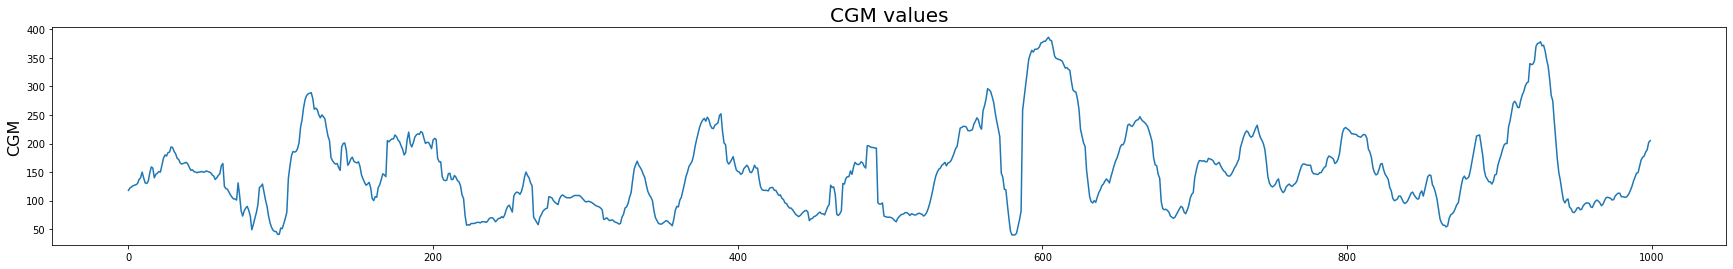

In [8]:
plt.figure(figsize=(30,4))
plt.plot(cgm_no_meal[:1000])
plt.title('CGM values', fontsize=20)
plt.ylabel('CGM', fontsize=16)

# ACF

In [ ]:
# acf_vals = acf(cgm_to_meal['cgm'])
# num_lags = 1000
# plt.bar(range(num_lags), acf_vals[:num_lags])
# plot_acf(cgm_to_meal, lags=30)

# PACF

In [ ]:
# plot_pacf(cgm_to_meal, lags=30)

## Based on PACF, we should start with a seasonal AR process

# Get training and testing sets

# Fit the SARIMA Model

In [29]:
# working setting -->
# train_data = cgm_to_meal[:10000]
# my_order = (5,0,20)
# my_seasonal_order = (1, 0, 1, 30)
# # define model
# # model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
# model = SARIMAX(train_data, order=my_order)

train_data = cgm_data
my_order = (5,0,20)
my_seasonal_order = (1, 0, 1, 400)
# define model
# model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
model = SARIMAX(train_data, order=my_order)

In [30]:
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

/opt/anaconda3/envs/MC-final-project/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/MC-final-project/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Model Fitting Time: 128.97866988182068


In [31]:
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                39725
Model:              SARIMAX(5, 0, 20)   Log Likelihood             -150528.048
Date:                Thu, 26 Nov 2020   AIC                         301108.096
Time:                        16:05:44   BIC                         301331.429
Sample:                             0   HQIC                        301178.810
                              - 39725                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3895      0.040     -9.763      0.000      -0.468      -0.311
ar.L2          1.1011      0.029     38.220      0.000       1.045       1.158
ar.L3          1.2530      0.024     51.984      0.0

In [66]:
test_data = cgm_data
test_data

array([118., 122., 124., ..., 314., 310., 314.])

In [67]:
#get the predictions and residuals
# predictions = model_fit.forecast(len(test_data))
predictions = model_fit.predict(0,len(cgm_data)-1)
predictions = pd.Series(predictions)
residuals = test_data - predictions

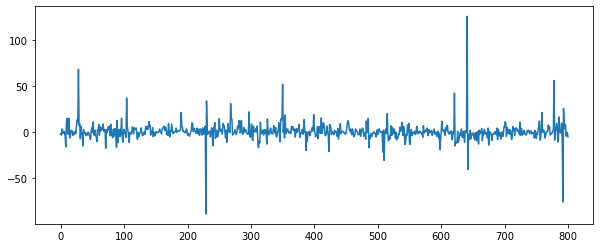

In [63]:
P = predictions.to_numpy()
labels = cgm_to_meal.meal.to_numpy()
ground_truth = cgm_to_meal.cgm.to_numpy()
searchval = 1
searchval2 = 0
ii = np.where(labels == searchval)[0]
ij = np.where(labels == searchval2)[0]
meal_pred = P[ii]
no_meal_pred = P[ij]
ground_meal = ground_truth[ii]
ground_no_meal = ground_truth[ij]
diff_meal = ground_meal - meal_pred
diff_no_meal = ground_no_meal - no_meal_pred

# plt.figure(figsize=(10,4))
# plt.plot(ground_truth - predictions)
plt.figure(figsize=(10,4))
plt.plot(diff_meal)

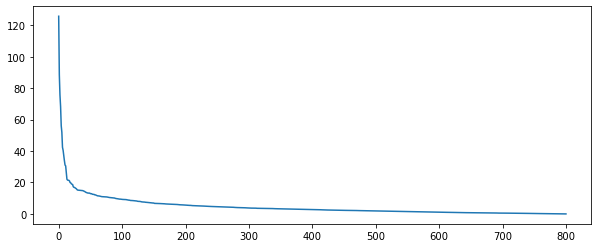

In [84]:
t1 = np.sort(np.abs(diff_meal))[::-1]
plt.figure(figsize=(10,4))
plt.plot(t1)

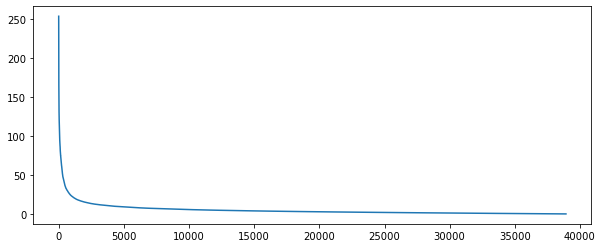

In [85]:
t1 = np.sort(np.abs(diff_no_meal))[::-1]
plt.figure(figsize=(10,4))
plt.plot(t1)

Text(0, 0.5, 'Error')

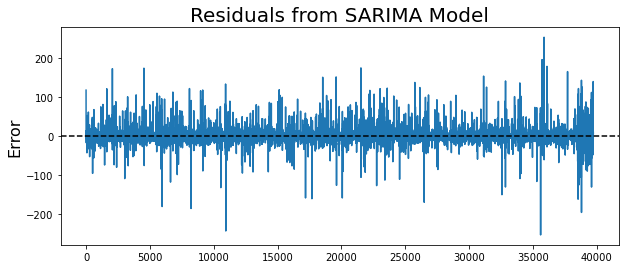

In [35]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

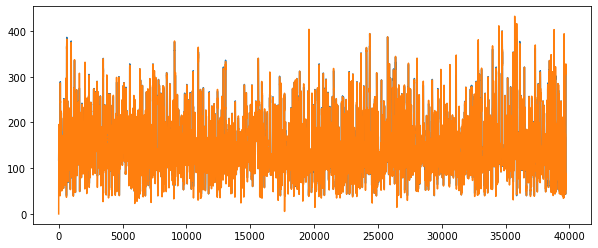

In [36]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)


In [ ]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

In [ ]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

# Using the Rolling Forecast Origin

In [ ]:
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = lim_catfish_sales[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred

In [ ]:
rolling_residuals = test_data - rolling_predictions

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(lim_catfish_sales)
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [ ]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data)),4))

In [ ]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

In [ ]:
model = pm.auto_arima(train_data, seasonal=True)

In [ ]:
model.param_names

In [ ]:
test_data = cgm_to_meal[10000:10100]
predictions = model.predict(len(test_data))
predictions = pd.Series(predictions)
residuals = test_data - predictions

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)
